In [28]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

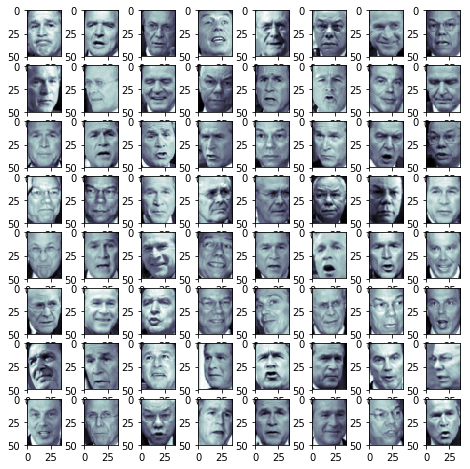

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [19]:
x,y = lfw.data, lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
pca_oliv = PCA()
pca_oliv.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
k = 0
total = 0
while total < 0.99:
    total = total + pca_oliv.explained_variance_ratio_[k]
    k = k+1
k

316

In [21]:
pca_lfw = PCA(n_components=k,whiten = True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [22]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

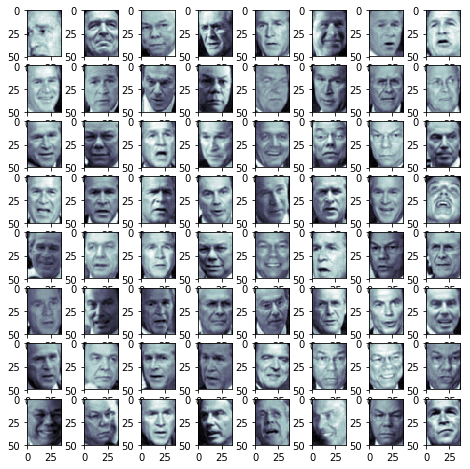

In [23]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i], cmap=plt.cm.bone)
plt.show()

In [24]:
pca_lfw.components_.shape

(316, 1850)

In [25]:
eigen_vec = pca_lfw.components_.reshape(k,50,37)

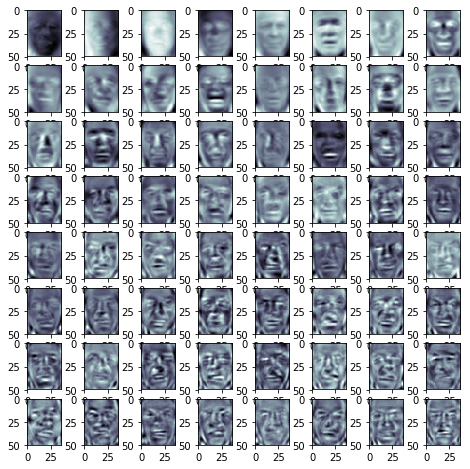

In [26]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_vec[i], cmap=plt.cm.bone)
plt.show()

In [27]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [32]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print("time:",time.time()-start,"\n")
y_pred = rf.predict(x_test)
print( classification_report(y_test,y_pred) )
print(confusion_matrix(y_test,y_pred))

time: 0.1595783233642578 

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        61
           1       0.90      0.25      0.39        36
           2       0.61      0.93      0.73       122
           3       1.00      0.13      0.23        31
           4       0.62      0.29      0.39        35

   micro avg       0.65      0.65      0.65       285
   macro avg       0.77      0.48      0.50       285
weighted avg       0.71      0.65      0.59       285

[[ 48   0  12   0   1]
 [  9   9  17   0   1]
 [  7   1 113   0   1]
 [  3   0  21   4   3]
 [  2   0  23   0  10]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print("time:",time.time()-start,"\n")
y_pred = rf.predict(x_test_pca)
print( classification_report(y_test,y_pred) )
print(confusion_matrix(y_test,y_pred))

time: 0.09474444389343262 

              precision    recall  f1-score   support

           0       0.40      0.41      0.41        61
           1       0.36      0.14      0.20        36
           2       0.55      0.84      0.66       122
           3       0.38      0.10      0.15        31
           4       0.31      0.11      0.17        35

   micro avg       0.49      0.49      0.49       285
   macro avg       0.40      0.32      0.32       285
weighted avg       0.44      0.49      0.43       285

[[ 25   2  32   1   1]
 [ 10   5  18   1   2]
 [ 13   2 103   0   4]
 [  8   2  16   3   2]
 [  6   3  19   3   4]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
